# Modelo RANDON FOREST

In [128]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

## Cargamos los datos de entrada del archivo .csv Train

In [129]:
# Load data
train = pd.read_csv('../data/Processed/train_processed.csv', sep=',')
df_train=pd.DataFrame(train)
df_train

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,...,1,0,0,1,0,0,0,0,0,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,...,0,1,0,0,0,0,0,1,0,0
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,...,0,1,1,0,0,0,0,0,0,0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,...,0,1,1,0,0,0,0,0,0,0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,...,1,0,1,0,0,0,0,0,0,0
8689,9278_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,...,0,1,0,0,0,0,0,0,1,0
8690,9279_01,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,...,0,1,0,0,0,0,0,0,1,0
8691,9280_01,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,0,0,0,1,0,0,0


In [130]:
# Definimos las variables que me guardan los datos a entrenar separados del target 
y=df_train['Transported']

X=df_train[['PassengerId', 'CryoSleep', 'Age','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Earth','Europa','Mars','Cabin_num','Cabin_Deck_A','Cabin_Deck_B','Cabin_Deck_C','Cabin_Deck_D',
       'Cabin_Deck_E','Cabin_Deck_F','Cabin_Deck_G','Cabin_Deck_T','Cabin_Side_P','Cabin_Side_S']]

In [131]:
#Separamos los datos 70% Train, 30% Test (Es la proporcion pedida en Kaggel)
from sklearn.model_selection import train_test_split

classes = list(df_train.loc[:, 'PassengerId':].columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (6085, 23)	y_train: (6085,)
X_test: (2608, 23)	y_test: (2608,)


In [132]:
# probamos con diferentess arboles. Probamos con el parametro max_depth=3 y vemos cuanto sale para poder comparar mas abajo con el parametro recomentado(8)
tree = DecisionTreeClassifier(max_depth=10, max_features=5, random_state=17)
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test) 
print("Cross Validation Score (Max_depth=3)",accuracy_score(y_test, tree_predictions))

Cross Validation Score (Max_depth=3) 0.7484662576687117


In [133]:
# y aqui ya aplicamos el max_deph recomendado, que es 8 y efectivamente da el mayor Score posible :)
tuned_tree = DecisionTreeClassifier(max_depth=9, splitter='best', criterion= 'entropy', max_leaf_nodes=80, class_weight='balanced',random_state=17)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_test)
print("Cross Validation Score (max_depth=11)",accuracy_score(y_test, tuned_tree_predictions))

Cross Validation Score (max_depth=11) 0.7917944785276073


### (Optional) Random forest without parameter tuning

In [134]:
# Creamos el modelo

rf = RandomForestClassifier(n_estimators=100, random_state=17, min_samples_leaf=1, max_depth=10, max_features=5, bootstrap= True, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=5, n_jobs=-1, random_state=17)

In [135]:
from sklearn.model_selection import cross_val_score
# %%time
cv_scores = cross_val_score(rf, X_train, y_train, cv=3)

In [136]:
cv_scores, cv_scores.mean()

(array([0.78758009, 0.79240631, 0.7938856 ]), 0.7912906673095473)

In [137]:
#Hacemos la prediccion y mostramos el resultado
forest_predictions = rf.predict(X_test) 
print("Resultado Random Forest (sin tuning): ",accuracy_score(y_test,forest_predictions))

Resultado Random Forest (sin tuning):  0.8155674846625767


In [138]:
def metrics(x,y):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    acc = accuracy_score(x,y)
    f1 = f1_score(x,y,average=None)
    f1av = np.mean( f1_score(x,y,average=None))
    #MATRIZ DE CONFUSION
    from sklearn.metrics import ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay.from_predictions(x, y)
    disp.ax_.set_title("Confusion Matrix from Predictions")
    return print(f'Accuracy score: {acc} \nF1 Score: {f1}\nMean F1: {f1av}'), plt.show()

Accuracy score: 0.8155674846625767 
F1 Score: [0.81320388 0.81787202]
Mean F1: 0.8155379508350397


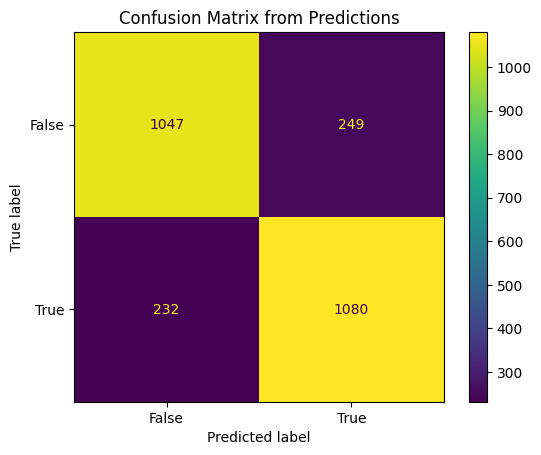

(None, None)

In [139]:
metrics(y_test, forest_predictions)

In [140]:
def graph_feat(model,X):
    feat_impor = pd.DataFrame(model.feature_importances_)
    fimport = feat_impor.set_axis(X.columns, axis='index')
    fimport.sort_values(by=[0], ascending= False, inplace = True)
    fig = plt.figure(figsize=(12, 8))
    plt.barh(fimport.index, fimport[0])
    plt.xlabel('Feature Importances')
    plt.xticks(rotation = 90)
    plt.ylabel('Feature Labels')
    plt.title('Comparacion de la importancia de las variables')
    return plt.show()


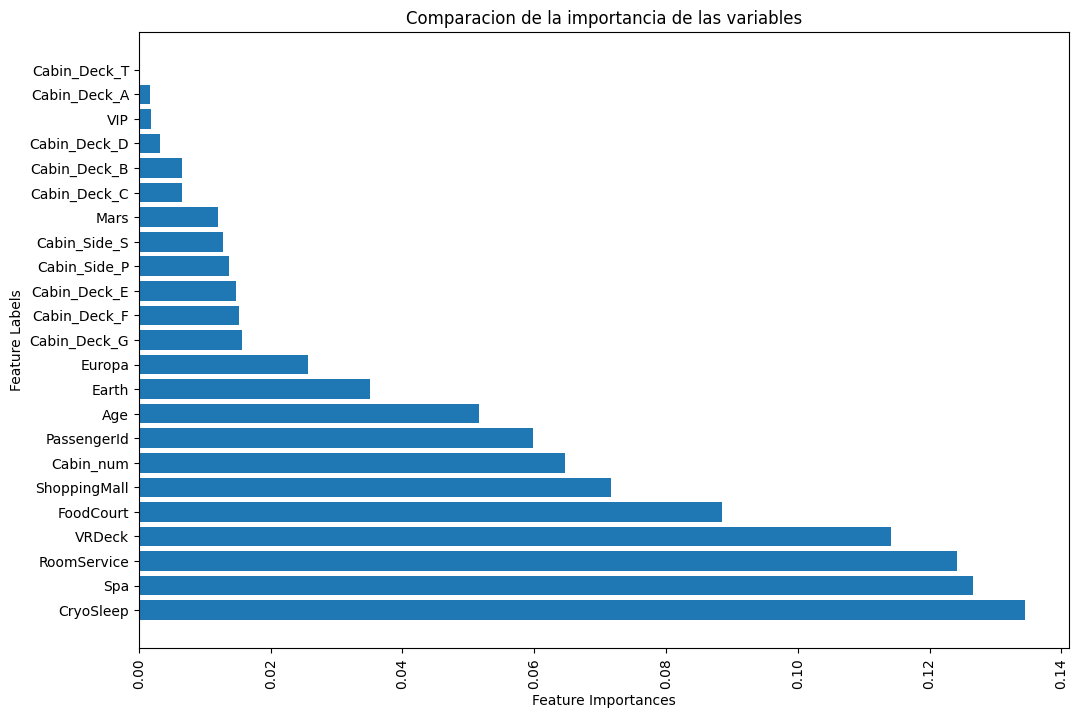

In [141]:
graph_feat(rf, X_train)

### (Optional) Random forest with parameter tuning

In [142]:
from sklearn.model_selection import GridSearchCV
forest_params = {'max_depth': range(10, 16),
                 'max_features': range(5, 105, 20)}

locally_best_forest = GridSearchCV(
    RandomForestClassifier(n_estimators=10, random_state=17,n_jobs=4),
                            forest_params, cv=3, verbose=1, n_jobs=4)

locally_best_forest.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
72 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\jobl

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=4,
                                              random_state=17),
             n_jobs=4,
             param_grid={'max_depth': range(10, 16),
                         'max_features': range(5, 105, 20)},
             verbose=1)

In [143]:
print("Best params:", locally_best_forest.best_params_)
print("Best cross validaton score", locally_best_forest.best_score_)

Best params: {'max_depth': 10, 'max_features': 5}
Best cross validaton score 0.784387638284973


In [144]:
tuned_forest_predictions = locally_best_forest.predict(X_test) 

print('MODELO RANDOM FOREST')
print("ACCURACY TRAIN:",accuracy_score(y_test,tuned_forest_predictions))


MODELO RANDOM FOREST
ACCURACY TRAIN: 0.8040644171779141


In [145]:
import sklearn.metrics as metrics
predictions = tree.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 936  360]
 [ 296 1016]]


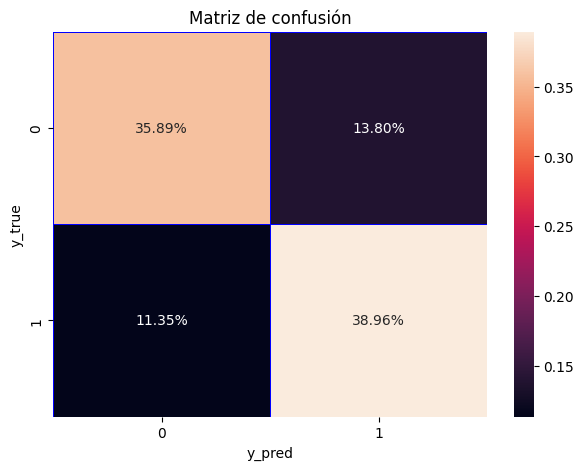

In [146]:
f, ax=plt.subplots(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, linewidths=0.5, fmt='.2%', linecolor="blue")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Matriz de confusión")
plt.show()

## Cargamos los datos de entrada del archivo .csv Test

In [147]:
# Load data
test = pd.read_csv('../data/Processed/test_processed.csv', sep=',')
df_test=pd.DataFrame(test)
df_test

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,0,0
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,...,0,1,0,0,1,0,0,0,0,0
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
4273,9269_01,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1,...,1,0,0,0,0,0,0,0,1,0
4274,9271_01,1,26.0,0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,0,1,0,0,0,0
4275,9273_01,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,0,...,1,0,0,0,0,1,0,0,0,0


In [148]:
prediccion_test = pd.DataFrame(rf.predict(df_test))
prediccion_test['PassengerId'] =df_test['PassengerId']
prediccion_test = prediccion_test.rename(columns = {0:'Transported'})
prediccion_test = prediccion_test[['PassengerId','Transported']]
prediccion_test.to_csv('../data/output/Random_Forest.csv', index=False)
prediccion_test

c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
